<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Top_ten_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

url  = [ #ibra50
  'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr50.csv'
#ibra100
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_IBr100.csv'
#div
  , 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Idiv.csv' 
#ibov
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Ibov.csv'
#small
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/Cart_Small.csv'
]

escolha = int(input('0-ibra50; 1-ibra100; 2-idiv; 3-ibov; 4-smal: '))
indice = { 0:'Ibra50' , 1:'Ibra100' , 2:'Idiv' , 3:'Ibov' , 4:'Small'}
df = pd.read_csv(url[escolha] ,sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , encoding='latin-1',index_col=False , engine='python')

data = yf.download((df['Código']+'.SA').to_list(),
                         period="3mo",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)

[*********************100%%**********************]  53 of 53 completed


In [22]:
data_close = data['Close']
data_returns = data_close.pct_change(1).dropna()
data_returns.head()

Ticker,ABCB4.SA,AGRO3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CIEL3.SA,...,TAEE11.SA,TASA4.SA,TGMA3.SA,TIMS3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WIZC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-02,-0.028510,-0.023383,0.010576,0.002427,-0.011428,0.006832,-0.008170,0.014049,0.015555,0.003591,...,0.028393,-0.000547,0.015277,0.030097,0.029235,0.010797,0.008850,0.009954,0.049007,0.008646
2024-05-03,0.008893,0.024342,0.018405,0.009477,-0.002968,0.012955,0.028007,0.000990,-0.003172,0.000000,...,0.009111,0.006695,0.062220,0.025910,0.015175,0.011619,0.002506,0.001095,0.013894,0.034286
2024-05-06,-0.003085,-0.006623,0.005670,-0.013611,-0.000726,0.012789,-0.036859,0.003460,-0.033413,0.000000,...,0.004035,-0.019950,0.009188,-0.003224,0.013798,0.003335,0.005000,0.002969,0.004171,-0.008287
2024-05-07,0.011936,0.015686,-0.003171,0.003247,0.000000,-0.013830,0.001664,0.001478,-0.074074,-0.003578,...,-0.006187,-0.024597,-0.003414,-0.061995,-0.013989,-0.009970,-0.003731,0.006232,-0.016218,-0.004178
2024-05-08,-0.004806,0.008494,0.003181,-0.006473,0.002179,-0.005488,0.009967,-0.005903,0.008000,0.001795,...,0.008772,-0.001739,-0.001142,-0.012069,-0.014187,0.004103,0.006242,-0.009136,-0.056293,-0.009790


Vamos remover ações que esticaram muito em um único dia;eliminar todas as linhas que cresceram mais de 20% em um dia.

In [23]:
print(data_returns.shape)
# set the growth theshold
daily_growth_threshold = 0.2
# keep only the columns without a daily growth that big
data_returns = data_returns.loc[:, ~(data_returns >=daily_growth_threshold).any()]
print(data_returns.shape)


(64, 53)
(64, 53)


In [24]:
# calculate the cumulative daily growth
data_cum_returns = (1 + data_returns).cumprod() -1

#### The  Top Ten  


In [25]:
# take the last row, transpose, x100
latest = data_cum_returns.tail(1).T.mul(100)
latest.columns = ['% change']
topten = round(latest.sort_values(by='% change', ascending=False)[:12], 2)
topten

,% change
Ticker,
JBSS3.SA,43.86
DIRR3.SA,26.22
CURY3.SA,21.09
CSMG3.SA,14.24
CMIG4.SA,12.77
CMIG3.SA,11.35
EGIE3.SA,11.27
CPLE6.SA,11.00
KEPL3.SA,10.93


In [26]:
data_cum_returns[list(topten.index)].mul(100)

Ticker,JBSS3.SA,DIRR3.SA,CURY3.SA,CSMG3.SA,CMIG4.SA,CMIG3.SA,EGIE3.SA,CPLE6.SA,KEPL3.SA,SAPR4.SA,LEVE3.SA,CPLE3.SA
Date,,,,,,,,,,,,
2024-05-02,1.834472,2.272734,3.277086,0.051079,6.345962,5.681820,1.442538,3.190319,6.591145,2.718446,1.011754,3.170735
2024-05-03,1.791809,5.917676,7.393584,-1.021456,7.676560,4.982524,4.254264,5.610563,5.561274,9.320387,2.904704,8.536583
2024-05-06,1.877127,5.488860,5.152959,1.430037,6.755373,5.769236,5.843513,5.060506,4.943351,6.990299,3.198438,6.463412
2024-05-07,3.711599,6.132084,4.892419,-0.561797,5.629476,6.293709,4.985121,5.170520,3.810503,7.184465,3.459535,4.999998
2024-05-08,4.394193,7.804462,6.664072,0.715013,6.448308,7.430069,9.689699,4.950493,4.119464,6.796115,4.830286,4.390251
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25,31.996586,28.584410,16.504557,13.463926,10.380040,11.880707,11.123715,10.231026,6.312300,7.602847,6.298957,8.536583
2024-07-26,40.870306,28.493600,17.704507,13.411925,11.937610,14.091788,12.079729,11.331130,10.820605,8.002116,8.028718,10.365859
2024-07-29,43.259390,27.358497,16.340923,14.867927,13.599020,13.649579,12.557741,11.331130,8.409187,8.002116,7.310711,10.243905


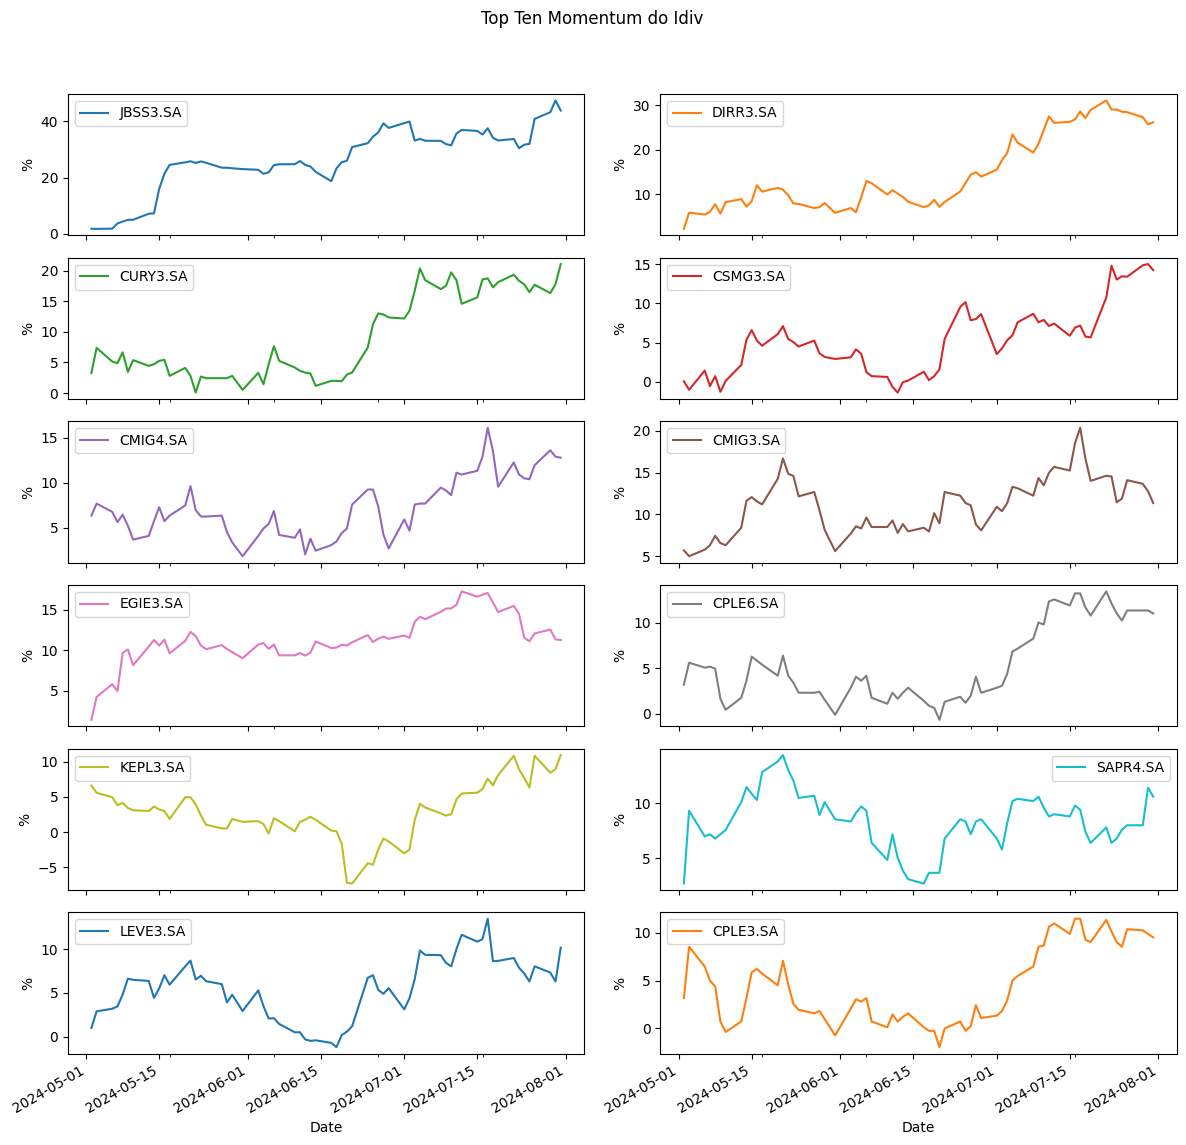

In [27]:
# plot the current top ten
data_cum_returns[list(topten.index)].mul(100).plot(subplots=True,
                                          layout=(6, 2),
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title=f'Top Ten Momentum do {indice[escolha]}')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Infos


In [28]:
topten.index

Index(['JBSS3.SA', 'DIRR3.SA', 'CURY3.SA', 'CSMG3.SA', 'CMIG4.SA', 'CMIG3.SA',
       'EGIE3.SA', 'CPLE6.SA', 'KEPL3.SA', 'SAPR4.SA', 'LEVE3.SA', 'CPLE3.SA'],
      dtype='object', name='Ticker')

In [29]:
# get further information
topten_info = {}
for i in topten.index:
    topten_info[i] = yf.Ticker(i).get_info()
# add the information to a data frame
info_df = pd.DataFrame.from_dict(topten_info,orient='index')
# add the growth data
info_df['Growth'] = topten
# rank the companies by growth rate
info_df.sort_values(by=['Growth'], ascending=False, inplace=True)
info_df.head()

,address1,address2,city,state,zip,country,phone,website,industry,industryKey,...,trailingPegRatio,trailingAnnualDividendRate,trailingAnnualDividendYield,earningsQuarterlyGrowth,earningsGrowth,lastSplitFactor,lastSplitDate,fax,irWebsite,Growth
JBSS3.SA,"Avenida Marginal Direita do Tietê, 500","Blocko I, 3rd Floor Vila Jaguara",São Paulo,SP,05118-100,Brazil,55 11 3144 4000,https://www.jbs.com.br,Packaged Foods,packaged-foods,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.86
DIRR3.SA,"Rua dos Otoni, 177",14th floor,Belo Horizonte,MG,30150-270,Brazil,55 31 3431 5509,https://direcional.com.br,Real Estate - Development,real-estate-development,...,None,0.470,0.016968,1.558,1.205,NaN,NaN,NaN,NaN,26.22
CURY3.SA,"Rua Funchal, 411",1st floor Vila Olímpia,São Paulo,SP,NaN,Brazil,55 11 3117 1300,https://cury.net,Real Estate - Development,real-estate-development,...,None,NaN,NaN,0.538,0.538,NaN,NaN,NaN,NaN,21.09
CSMG3.SA,"Rua Mar de Espanha, 525",Bairro Santo Antonio,Belo Horizonte,MG,30330-270,Brazil,55 31 3250 2015,https://www.copasa.com.br,Utilities - Regulated Water,utilities-regulated-water,...,None,1.335,0.060353,0.041,0.042,3:1,1.606349e+09,NaN,NaN,14.24
CMIG4.SA,"Avenida Barbacena, 1200",NaN,Belo Horizonte,MG,30190-131,Brazil,51 31 3506 5024,https://www.cemig.com.br,Utilities - Diversified,utilities-diversified,...,None,1.092,0.100460,-0.175,-0.175,130:100,1.714435e+09,NaN,NaN,12.77


#### Setores das top ten

In [30]:
info_df['sector'].value_counts()

sector
Utilities             7
Real Estate           2
Consumer Defensive    1
Industrials           1
Consumer Cyclical     1
Name: count, dtype: int64